In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%reset -f

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler
# tf.config.run_functions_eagerly(True)
plt.style.use('classic')

In [ ]:
print(f"TensorFlow version = {tf.__version__}\n")
scaler = MinMaxScaler()

TensorFlow version = 2.15.0



- Path and Read

In [ ]:
path_file1 = r'/content/drive/MyDrive/datax10/datos_lento.xlsx'
path_file2 = r'/content/drive/MyDrive/datax10/datos_normal.xlsx'
path_file3 = r'/content/drive/MyDrive/datax10/datos_quieto.xlsx'
path_file4 = r'/content/drive/MyDrive/datax10/datos_pose1.xlsx'

df_slow = pd.read_excel(path_file1)
df_fast = pd.read_excel(path_file2)
df_stay = pd.read_excel(path_file3)
df_pose1 = pd.read_excel(path_file4)

# df.head(2)

In [ ]:
data_s = df_slow.shape[0]
data_s2 = df_fast.shape[0]
data_s3 = df_stay.shape[0]
data_s4 = df_pose1.shape[0]

size = min(data_s, data_s2, data_s3, data_s4)
init_control = 20
df_slow = df_slow.iloc[:size]
df_fast = df_fast.iloc[:size]
df_stay = df_stay.iloc[:size]
df_pose1 = df_pose1.iloc[:size]

index = range(1, len(df_slow['Acc_X0']) + 1)
df_slow.to_csv(r'/content/drive/MyDrive/datax10/slow.csv', index=False)
df_fast.to_csv(r'/content/drive/MyDrive/datax10/fast.csv', index=False)
df_stay.to_csv(r'/content/drive/MyDrive/datax10/stay.csv', index=False)
df_stay.to_csv(r'/content/drive/MyDrive/datax10/pose1.csv', index=False)

<ipython-input-179-9d8c44031b3f>:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['Acc_Y0'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')


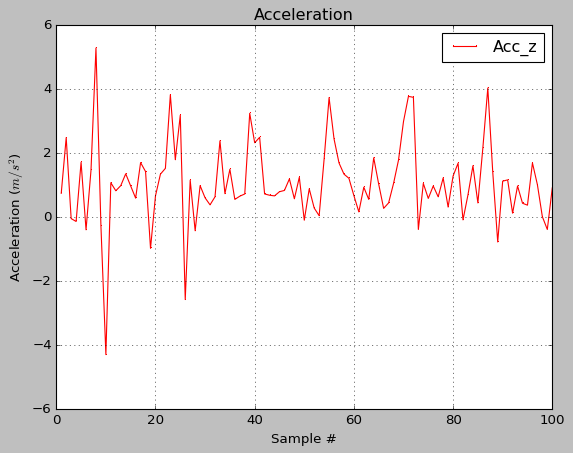

In [ ]:
# plt.plot(index[:100], df_slow['De_Z0K'][:100], 'g.', label='DeZ', linestyle='solid', marker=',')
# plt.plot(index[:100], df_slow['De_Z1K'][:100], 'r.', label='DeZ1', linestyle='solid', marker=',')

# plt.plot(index[:100], df_slow['Yaw_k'][:100], 'b.', label='yawk', linestyle='solid', marker=',')
# plt.plot(index[:100], df_slow['Yaw1_k'][:100], 'r.', label='yaw1k', linestyle='solid', marker=',')

plt.plot(index[:100], df_slow['Acc_Y0'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')

# plt.plot(index[:100], df_stay['De_Z0K'][:100], 'g.', label='Acc_x', linestyle='solid', marker=',')
# plt.plot(index[:100], df_stay['Acc_Y0'][:100], 'b.', label='Acc_y', linestyle='solid', marker=',')
# plt.plot(index[:100], df_stay['Yaw_k'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')

plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration ($m/s^2$)")
plt.legend()
plt.grid()
plt.show()


<ipython-input-180-79b7fe2a5b1a>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['Acc_X0'][:100], 'g.', label='Acc_x', linestyle='solid', marker=',')
<ipython-input-180-79b7fe2a5b1a>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['Acc_Y0'][:100], 'b.', label='Acc_y', linestyle='solid', marker=',')
<ipython-input-180-79b7fe2a5b1a>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['Acc_Z0'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')


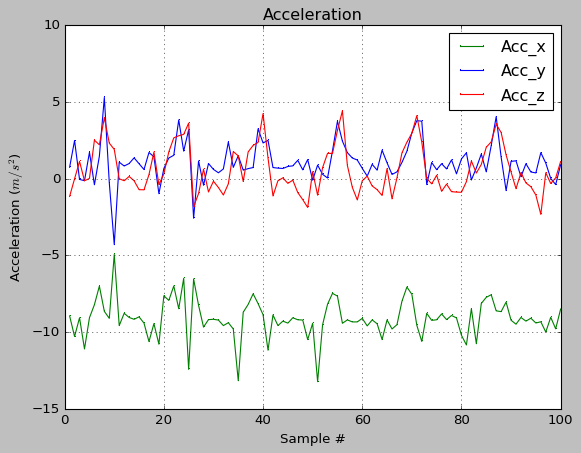

In [ ]:
plt.plot(index[:100], df_slow['Acc_X0'][:100], 'g.', label='Acc_x', linestyle='solid', marker=',')
plt.plot(index[:100], df_slow['Acc_Y0'][:100], 'b.', label='Acc_y', linestyle='solid', marker=',')
plt.plot(index[:100], df_slow['Acc_Z0'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration ($m/s^2$)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-181-1f5eed8ece89>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_stay['Acc_X0'][:100], 'g.', label='Acc_x', linestyle='solid', marker=',')
<ipython-input-181-1f5eed8ece89>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_stay['Acc_Y0'][:100], 'b.', label='Acc_y', linestyle='solid', marker=',')
<ipython-input-181-1f5eed8ece89>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_stay['Acc_Z0'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')


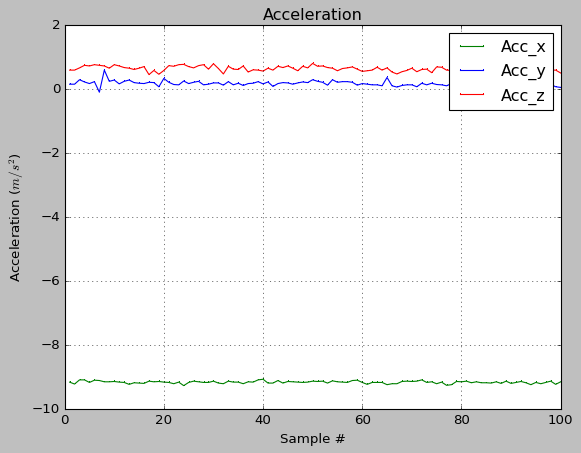

In [ ]:
plt.plot(index[:100], df_stay['Acc_X0'][:100], 'g.', label='Acc_x', linestyle='solid', marker=',')
plt.plot(index[:100], df_stay['Acc_Y0'][:100], 'b.', label='Acc_y', linestyle='solid', marker=',')
plt.plot(index[:100], df_stay['Acc_Z0'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration ($m/s^2$)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-182-e461dfe833e2>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['Acc_X0'][:100], 'g.', label='Acc_x', linestyle='solid', marker=',')
<ipython-input-182-e461dfe833e2>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['Acc_Y0'][:100], 'b.', label='Acc_y', linestyle='solid', marker=',')
<ipython-input-182-e461dfe833e2>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['Acc_Z0'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')


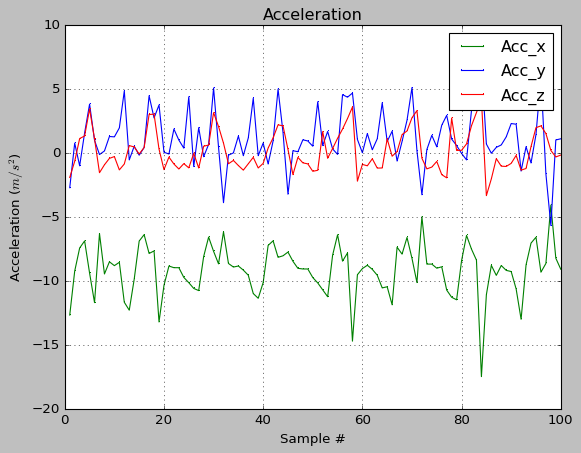

In [ ]:
plt.plot(index[:100], df_fast['Acc_X0'][:100], 'g.', label='Acc_x', linestyle='solid', marker=',')
plt.plot(index[:100], df_fast['Acc_Y0'][:100], 'b.', label='Acc_y', linestyle='solid', marker=',')
plt.plot(index[:100], df_fast['Acc_Z0'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration ($m/s^2$)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-183-72d0c2f231be>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_pose1['Acc_X0'][:100], 'g.', label='Acc_x', linestyle='solid', marker=',')
<ipython-input-183-72d0c2f231be>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_pose1['Acc_Y0'][:100], 'b.', label='Acc_y', linestyle='solid', marker=',')
<ipython-input-183-72d0c2f231be>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_pose1['Acc_Z0'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')


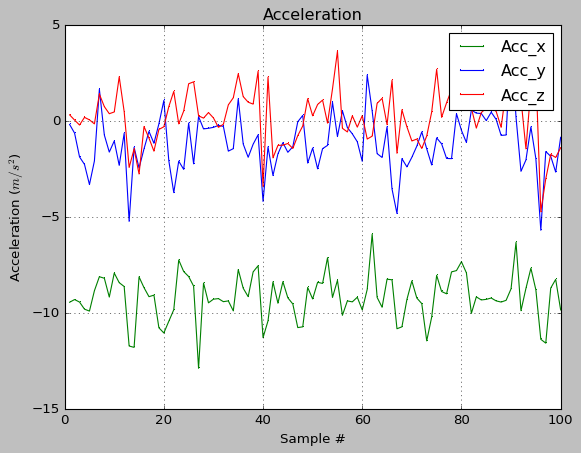

In [ ]:
plt.plot(index[:100], df_pose1['Acc_X0'][:100], 'g.', label='Acc_x', linestyle='solid', marker=',')
plt.plot(index[:100], df_pose1['Acc_Y0'][:100], 'b.', label='Acc_y', linestyle='solid', marker=',')
plt.plot(index[:100], df_pose1['Acc_Z0'][:100], 'r.', label='Acc_z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration ($m/s^2$)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-184-a7664315e216>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['Gy_X0'][:100], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-184-a7664315e216>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['Gy_Y0'][:100], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-184-a7664315e216>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['Gyro_Z0'][:100], 'r.', label='z', linestyle='solid', marker=',')


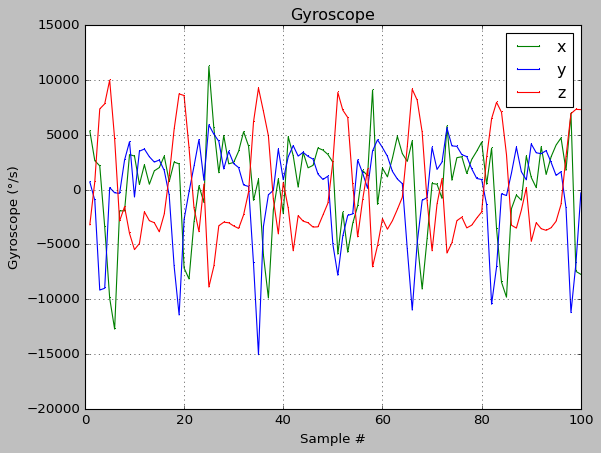

In [ ]:
plt.plot(index[:100], df_slow['Gy_X0'][:100], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index[:100], df_slow['Gy_Y0'][:100], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index[:100], df_slow['Gyro_Z0'][:100], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (°/s)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-185-3cab1516914d>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['De_Y0'][:100], 'g.', label='angle_y', linestyle='--', marker=',')
<ipython-input-185-3cab1516914d>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['De_Y0K'][:100], 'b.', label='angle_y_kalman', linestyle='solid', marker=',')
<ipython-input-185-3cab1516914d>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['De_Z0'][:100], 'r.', label='angle_z', linestyle='--', marker=',')


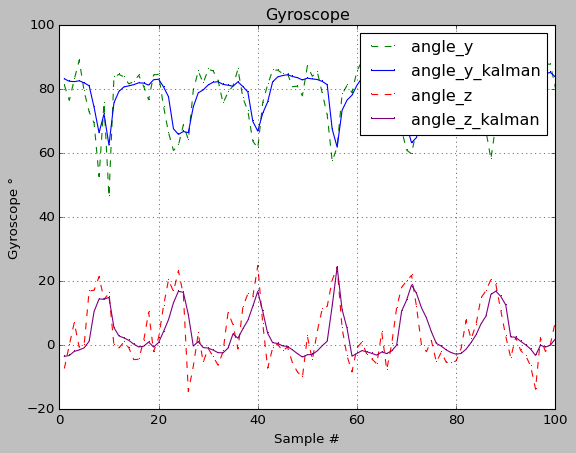

In [ ]:
plt.plot(index[:100], df_slow['De_Y0'][:100], 'g.', label='angle_y', linestyle='--', marker=',')
plt.plot(index[:100], df_slow['De_Y0K'][:100], 'b.', label='angle_y_kalman', linestyle='solid', marker=',')
plt.plot(index[:100], df_slow['De_Z0'][:100], 'r.', label='angle_z', linestyle='--', marker=',')
plt.plot(index[:100], df_slow['De_Z0K'][:100], 'purple', label='angle_z_kalman', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope °")
plt.legend()
plt.grid()
plt.show()

<ipython-input-186-81f8dc24e325>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_stay['De_Y0'][:100], 'g.', label='angle_y', linestyle='--', marker=',')
<ipython-input-186-81f8dc24e325>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_stay['De_Y0K'][:100], 'b.', label='angle_y_kalman', linestyle='solid', marker=',')
<ipython-input-186-81f8dc24e325>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_stay['De_Z0'][:100], 'r.', label='angle_z', linestyle='--', marker=',')


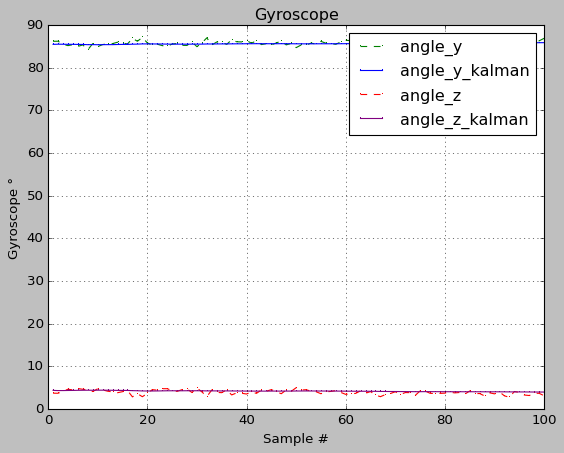

In [ ]:
plt.plot(index[:100], df_stay['De_Y0'][:100], 'g.', label='angle_y', linestyle='--', marker=',')
plt.plot(index[:100], df_stay['De_Y0K'][:100], 'b.', label='angle_y_kalman', linestyle='solid', marker=',')
plt.plot(index[:100], df_stay['De_Z0'][:100], 'r.', label='angle_z', linestyle='--', marker=',')
plt.plot(index[:100], df_stay['De_Z0K'][:100], 'purple', label='angle_z_kalman', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope °")
plt.legend()
plt.grid()
plt.show()

<ipython-input-187-0a3261878fe0>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['De_Y0'][:100], 'g.', label='angle_y', linestyle='--', marker=',')
<ipython-input-187-0a3261878fe0>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['De_Y0K'][:100], 'b.', label='angle_y_kalman', linestyle='solid', marker=',')
<ipython-input-187-0a3261878fe0>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['De_Z0'][:100], 'r.', label='angle_z', linestyle='--', marker=',')


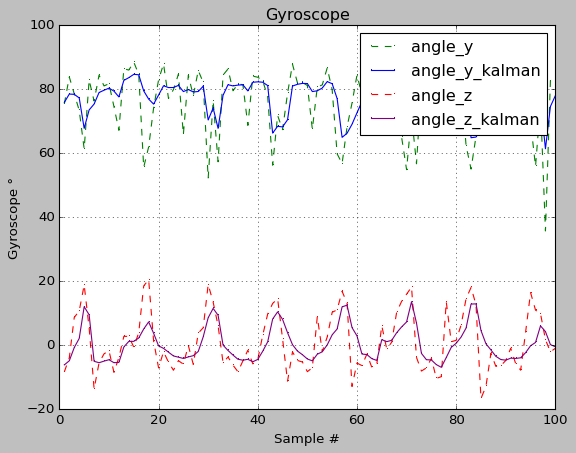

In [ ]:
plt.plot(index[:100], df_fast['De_Y0'][:100], 'g.', label='angle_y', linestyle='--', marker=',')
plt.plot(index[:100], df_fast['De_Y0K'][:100], 'b.', label='angle_y_kalman', linestyle='solid', marker=',')
plt.plot(index[:100], df_fast['De_Z0'][:100], 'r.', label='angle_z', linestyle='--', marker=',')
plt.plot(index[:100], df_fast['De_Z0K'][:100], 'purple', label='angle_z_kalman', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope °")
plt.legend()
plt.grid()
plt.show()

<ipython-input-188-b52ece51904f>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_pose1['De_Y0'][:100], 'g.', label='angle_y', linestyle='--', marker=',')
<ipython-input-188-b52ece51904f>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_pose1['De_Y0K'][:100], 'b.', label='angle_y_kalman', linestyle='solid', marker=',')
<ipython-input-188-b52ece51904f>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_pose1['De_Z0'][:100], 'r.', label='angle_z', linestyle='--', marker=',')


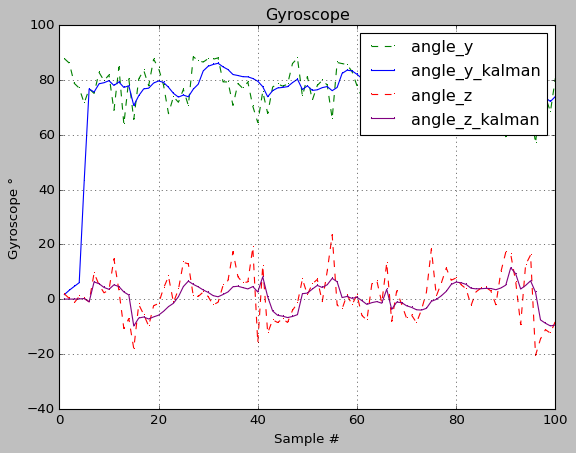

In [ ]:
plt.plot(index[:100], df_pose1['De_Y0'][:100], 'g.', label='angle_y', linestyle='--', marker=',')
plt.plot(index[:100], df_pose1['De_Y0K'][:100], 'b.', label='angle_y_kalman', linestyle='solid', marker=',')
plt.plot(index[:100], df_pose1['De_Z0'][:100], 'r.', label='angle_z', linestyle='--', marker=',')
plt.plot(index[:100], df_pose1['De_Z0K'][:100], 'purple', label='angle_z_kalman', linestyle='solid', marker=',')

plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope °")
plt.legend()
plt.grid()
plt.show()

<ipython-input-189-280c4c253981>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['Yaw'][:100], 'g.', label='Yaw', linestyle='--', marker=',') # z axis
<ipython-input-189-280c4c253981>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['Yaw_k'][:100], 'b.', label='Yawk', linestyle='solid', marker=',')


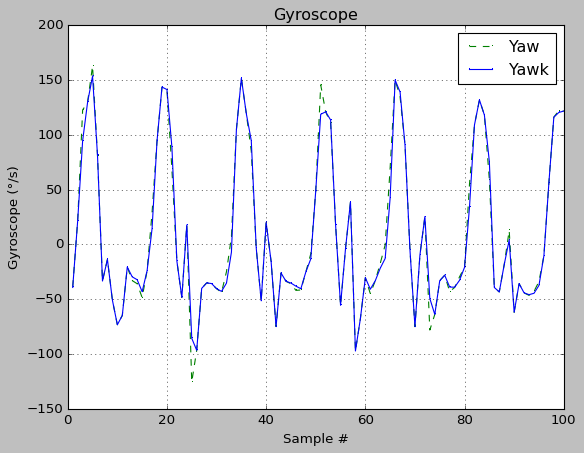

In [ ]:
plt.plot(index[:100], df_slow['Yaw'][:100], 'g.', label='Yaw', linestyle='--', marker=',') # z axis
plt.plot(index[:100], df_slow['Yaw_k'][:100], 'b.', label='Yawk', linestyle='solid', marker=',')
# plt.plot(index, df_slow['Pitch'], 'r.', label='Pitch', linestyle='--', marker=',')
# plt.plot(index, df_slow['Pitch_K'], 'purple', label='PitchK', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (°/s)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-190-7fa84f9cc6d4>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['Yaw'][:100], 'g.', label='Yaw', linestyle='--', marker=',') # z axis
<ipython-input-190-7fa84f9cc6d4>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['Yaw_k'][:100], 'b.', label='Yawk', linestyle='solid', marker=',')


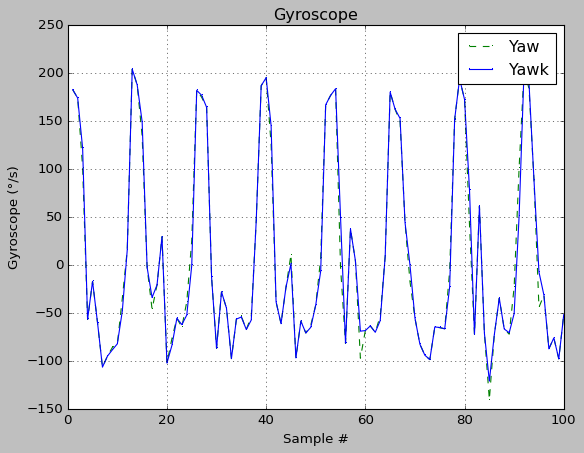

In [ ]:
plt.plot(index[:100], df_fast['Yaw'][:100], 'g.', label='Yaw', linestyle='--', marker=',') # z axis
plt.plot(index[:100], df_fast['Yaw_k'][:100], 'b.', label='Yawk', linestyle='solid', marker=',')
# plt.plot(index, df_slow['Pitch'], 'r.', label='Pitch', linestyle='--', marker=',')
# plt.plot(index, df_slow['Pitch_K'], 'purple', label='PitchK', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (°/s)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-191-591e50e9f7d2>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['Yaw1'][:100], 'g.', label='Yaw', linestyle='--', marker=',') # z axis
<ipython-input-191-591e50e9f7d2>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['Yaw1_k'][:100], 'b.', label='Yawk', linestyle='solid', marker=',')


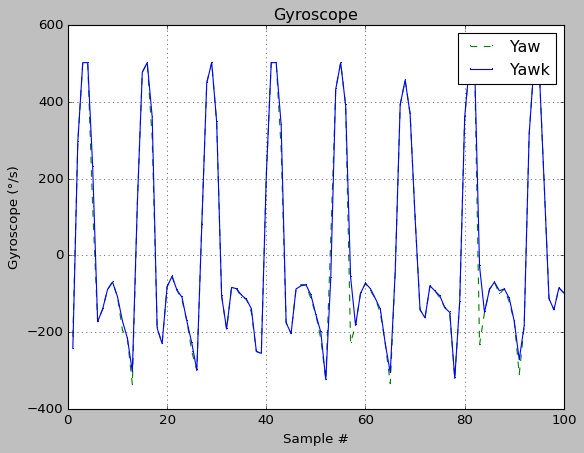

In [ ]:
plt.plot(index[:100], df_fast['Yaw1'][:100], 'g.', label='Yaw', linestyle='--', marker=',') # z axis
plt.plot(index[:100], df_fast['Yaw1_k'][:100], 'b.', label='Yawk', linestyle='solid', marker=',')
# plt.plot(index, df_slow['Pitch'], 'r.', label='Pitch', linestyle='--', marker=',')
# plt.plot(index, df_slow['Pitch_K'], 'purple', label='PitchK', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (°/s)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-192-23bfe844aaaa>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_slow['Pitch'][:100], 'r.', label='Pitch', linestyle='--', marker=',')


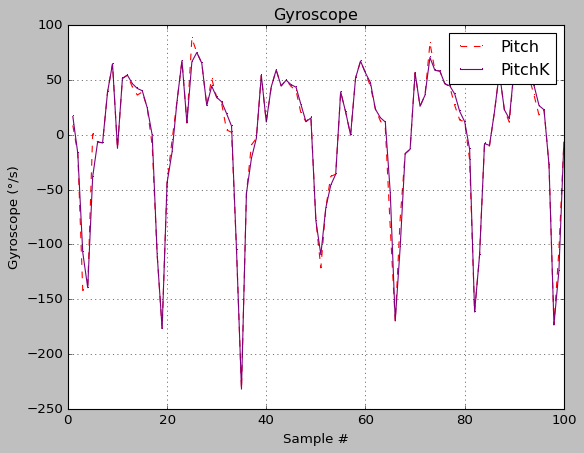

In [ ]:
plt.plot(index[:100], df_slow['Pitch'][:100], 'r.', label='Pitch', linestyle='--', marker=',')
plt.plot(index[:100], df_slow['Pitch_K'][:100], 'purple', label='PitchK', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (°/s)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-193-a48e5ea5cd2f>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index[:100], df_fast['Pitch1'][:100], 'r.', label='Pitch', linestyle='--', marker=',')


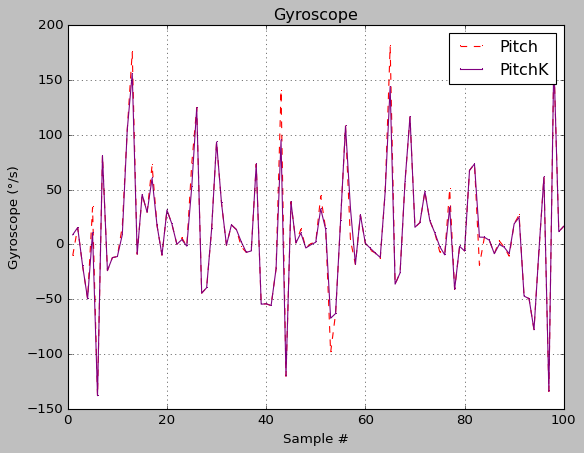

In [ ]:
plt.plot(index[:100], df_fast['Pitch1'][:100], 'r.', label='Pitch', linestyle='--', marker=',')
plt.plot(index[:100], df_fast['Pitch1_K'][:100], 'purple', label='PitchK', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (°/s)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
GESTURES = [
    "slow",
    "stay",
    "fast"
]
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

SAMPLES_PER_GESTURE = 40
NUM_GESTURES = len(GESTURES)
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
inputs = []
outputs = []
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")

  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = pd.read_csv("/content/drive/MyDrive/datax10/" + gesture + ".csv")
  dfn = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +11 you could change it
      # - gyroscope is between: -1 to +1
      tensor += [
          (dfn['De_Z0K'][index]),
          (dfn['De_Z1K'][index]),
          (dfn['Yaw_k'][index]),
          (dfn['Yaw1_k'][index]),
          (dfn['Acc_Y0'][index])
      ]

    inputs.append(tensor)
    outputs.append(output)

inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")


Processing index 0 for gesture 'slow'.
	There are 101 recordings of the slow gesture.
Processing index 1 for gesture 'stay'.
	There are 101 recordings of the stay gesture.
Processing index 2 for gesture 'fast'.
	There are 101 recordings of the fast gesture.
Data set parsing and preparation complete.


In [ ]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

inputs = inputs[randomize]
outputs = outputs[randomize]

TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(10, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='relu',kernel_regularizer= regularizers.L1(l1=1e-4)))
# #model.add(tf.keras.layers.Dropout(rate=0.2, noise_shape = (1, 60), seed = 1))
# model.add(tf.keras.layers.Dense(NUM_GESTURES, activation = 'softmax'))
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
# model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
# history = model.fit(inputs_train, outputs_train, epochs=300, batch_size=1, validation_data=(inputs_validate, outputs_validate))
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=200, batch_size=1, validation_data=(inputs_validate, outputs_validate))


Epoch 1/200
181/181 [==============================] - 2s 6ms/step - loss: 0.1802 - mae: 0.3801 - val_loss: 0.1234 - val_mae: 0.3094
Epoch 2/200
181/181 [==============================] - 1s 4ms/step - loss: 0.0913 - mae: 0.2370 - val_loss: 0.0712 - val_mae: 0.1870
Epoch 3/200
181/181 [==============================] - 1s 5ms/step - loss: 0.0446 - mae: 0.1357 - val_loss: 0.0846 - val_mae: 0.1762
Epoch 4/200
181/181 [==============================] - 1s 4ms/step - loss: 0.0255 - mae: 0.0784 - val_loss: 0.0128 - val_mae: 0.0553
Epoch 5/200
181/181 [==============================] - 1s 5ms/step - loss: 0.0222 - mae: 0.0521 - val_loss: 0.0121 - val_mae: 0.0362
Epoch 6/200
181/181 [==============================] - 1s 6ms/step - loss: 0.0170 - mae: 0.0347 - val_loss: 0.0157 - val_mae: 0.0442
Epoch 7/200
181/181 [==============================] - 1s 4ms/step - loss: 0.0152 - mae: 0.0248 - val_loss: 0.0109 - val_mae: 0.0194
Epoch 8/200
181/181 [==============================] - 1s 3ms/step - 

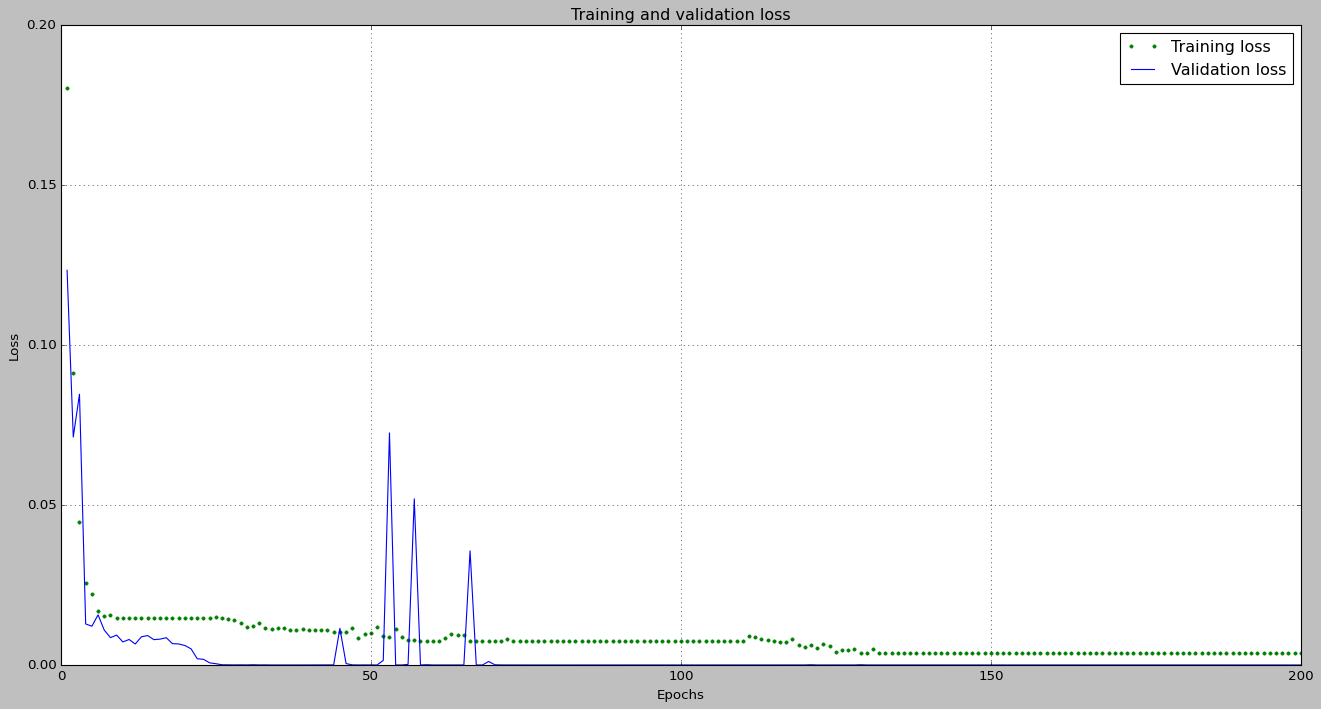

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

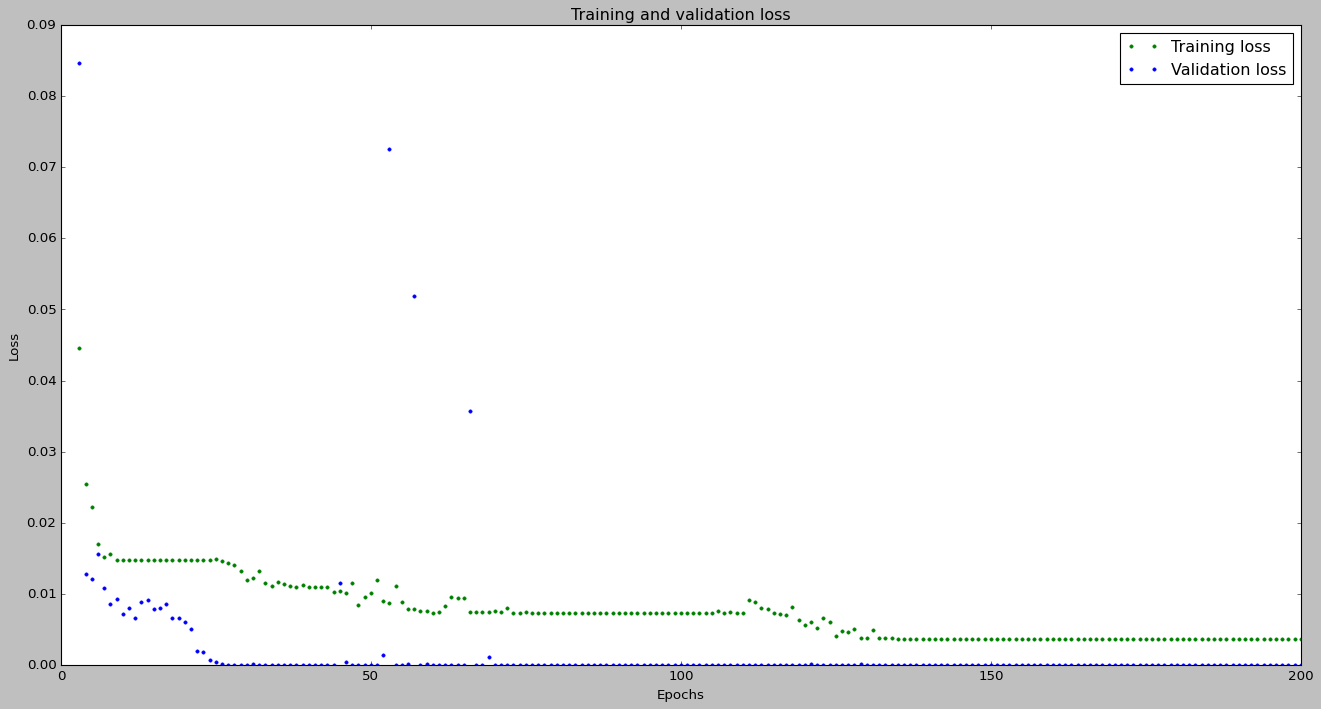

In [ ]:
SKIP = 2
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

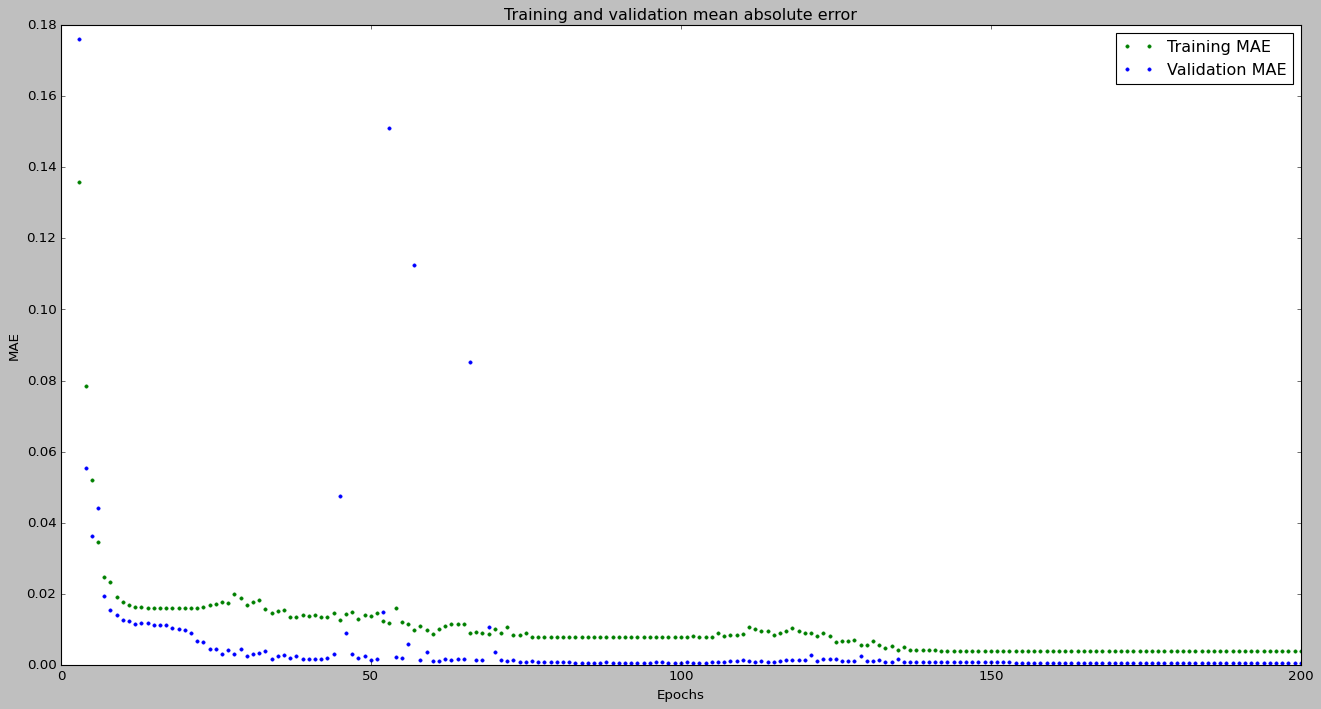

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)


2/2 [==============================] - 0s 11ms/step
predictions =
 [[0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.996 0.    0.004]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    0.999 0.001]
 [1.    0.    0.   ]
 [0.999 0.    0.   ]
 [0.    0.999 0.001]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    0.999]
 [1.    0.    0.   ]
 [0.001 0.    0.999]
 [0.    0.    0.999]
 [0.998 0.002 0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.001 0.    0.999]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.999 0.    0.001]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.001 0.    0.999]
 [0.    1.    0.   ]
 [0.    0.    0.999]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.999 0.001]
 [0.    0.998 0.002]
 [0.999 0.    0.001]
 [0.    0.    1.   ]
 [0.    0.    0.999]
 [0.001 0.    0.999]
 [0.    1.    0.   ]
 [0.001 0.    0.999]
 [0.    0.    1.   ]
 [0.    0.999 0.001]
 [0.    0

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
!apt-get -qq install xxd
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 48856 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 301,314 bytes.
